In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

In [2]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))

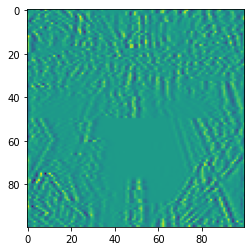

In [3]:
plt.imshow(broken_image.view(100, 100))

In [4]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [5]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [6]:
# torch.random.manual_seed(777)
random_tensor = torch.randn(10000, dtype=torch.float)

In [7]:
lr = 0.8 
for i in range(0, 5000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        # print('Loss at {} = {}'.format(i, loss.item()))
        print(f'Loss at {i} = {loss.item()}')

Loss at 0 = 12.343832015991211
Loss at 1000 = 1.132638931274414
Loss at 2000 = 0.5450534224510193
Loss at 3000 = 0.37937992811203003
Loss at 4000 = 0.29977190494537354


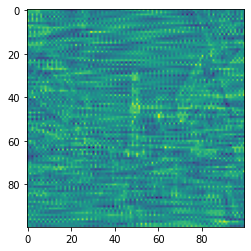

In [8]:
plt.imshow(random_tensor.view(100,100).data)